## Consignas TP 5: números peudoaleatoreos, Simulaciones por Monte Carlo
### 0. Cree dos vectores de 1000 números random entre -250 y 250, a continuación plotee una distribucion con los valores que obtuvo.

In [31]:
import matplotlib.pyplot as plt
import random
import pandas as pd
import numpy as np
from datetime import datetime as dt

In [21]:
#inicializamos nuestra semilla
minutos = dt.now().minute
segundos = dt.now().second
np.random.seed(minutos+segundos)

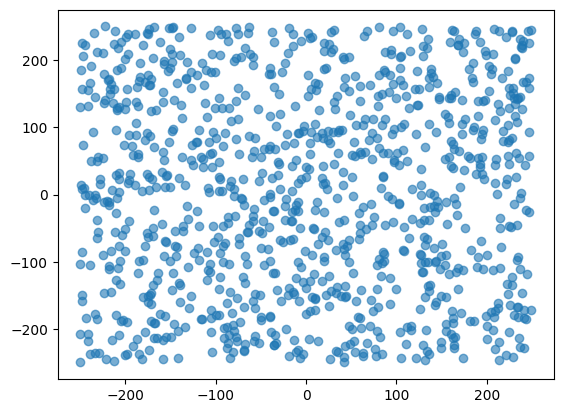

In [22]:
x = 1000
inicio = -250
fin = 250

random_list = np.random.random(1000) * (fin - inicio) + inicio
random_list2 = np.random.random(1000) * (fin - inicio) + inicio
plt.scatter(random_list,random_list2, alpha = 0.6)

### 1. Calcule la probabilidad de obtener un número 'x' luego de 'n' veces de lanzar un dado, guarde los valores en una lista y realice un histograma con los resultados, qué conclusiones puede sacar a medida que varía 'n'?

la probabilidad de que salga el 6 es del 14.000000000000002% en 50 tiradas

El set de datos ( primeros 25 numeros) :
[1 1 1 6 2 6 2 6 1 5 5 5 5 4 2 6 1 2 5 1 2 3 1 2 6]


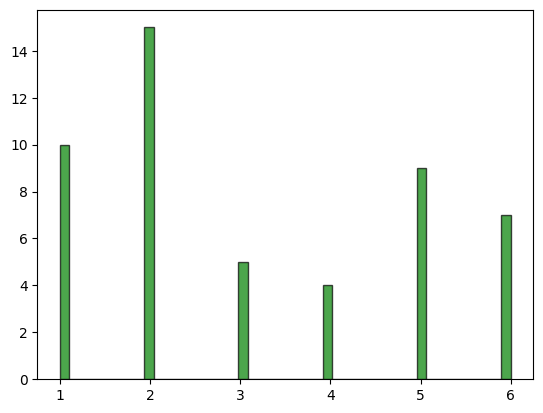

In [23]:
#para ello vamos a crear una función que lo haga por nosotros ;)

def tirar_dado(n):
    # n: la cantidad de veces que lo quiero tirar
    # recordando que la funcion random nos devuelve valores decimales, debemos convertir un intervalo entre 1.0 y 6.99 a uno entre 1 y 6
    return (np.random.random(n) * 6 + 1).astype(int) 

#creamos otra funcion que nos devuelva la probabilidad

def probabilidad(dados, x):
    # dados: es el vector que nos va a devolver la funcion tirar_dado
    # x: es el numero al que le quiero calcular la probabilidad
    contador = 0 #donde voy a sumar cada vez que aparezca mi numero
    for dado in dados:
        if dado == x:
            contador += 1
    return round(contador / len(dados),3)

n = 50
x = 6 # quiero ver cuantas veces sale el 6

dados = tirar_dado(n)
prob =  probabilidad(dados, x)

print(f'la probabilidad de que salga el {x} es del {prob*100}% en {n} tiradas')
print('')
print('El set de datos ( primeros 25 numeros) :')
print(dados[:25])
plt.hist(dados, bins = 48, color = 'green', ec = 'black', alpha = 0.7)
plt.show()

### 2. Determine la integral $\int_0^4 x^{2} dx$ 

22.528


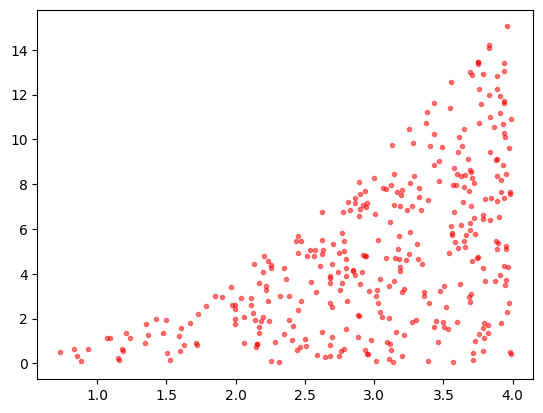

In [24]:
contador = 0
n = 1000
max = 4

def f(x):
    return x**2

for i in range(n):
    
    x = np.random.random() * max
    y = np.random.random() * f(max)

    if y < f(x):
        contador +=1
        plt.plot(x,y,'.r',alpha = 0.5)
        
area = max * f(max)
integral = (contador / n) * area 
print(integral)
plt.show()


### 3. Calcule el valor de $\pi$<br><br>

Para estimar este valor, recordemos el ejercicio $0$, donde les pedí hagan un gráfico de distribución. Ven que les devolvió un ploteo cuadrado también? bueno, vamos a utilizar esto para crear un círculo dentro de este cuadrado, y ver  a partir de la relación entre estas superficies y los puntos generados pseudoaleatoreamente como obtener el valor de $\pi$.

valor estimado de pi para 1000 iteraciones: 3.168


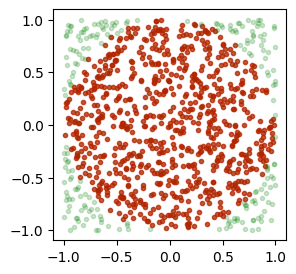

In [25]:
n = 1000 #cantidad de puntos
r = 1 #radio de la circunferencia
fin = r #limite max valor numero pseudoaleatorio
inicio = -r #limite min valor numero pseudoaleatorio
cuadrado = 0 #contador
circulo = 0 #contador
 
plt.figure(figsize=(3,3))

for i in range(n):
    # como estoy trabajando con dos dimensiones, voy a generar valores random para 'x' e 'y' entre r y -r
    rand_x = np.random.rand() * (fin - inicio) + (inicio) 
    rand_y = np.random.rand() * (fin - inicio) + (inicio)  
 
    # para ver que caiga dentro del circulo de radio r
    distancia_centro = np.sqrt(rand_x**2 + rand_y**2)

    if distancia_centro <= r:
        circulo += 1
        plt.plot(rand_x,rand_y,'.r',alpha = 0.7)
    cuadrado += 1
    plt.plot(rand_x,rand_y,'.g',alpha = 0.2)

pi = 4 * circulo / cuadrado
print(f'valor estimado de pi para {n} iteraciones: {pi}')
plt.show()

### 4. Calcule la integral de la distribucion de la campana de Gauss.
Al ser una función simétrica, se puede calcular la integral entre 0 e infinito.<br>
Tener en cuenta que el infinito no existe en computación. Limite bien el rectángulo dentro del cuál generará los números aleatorios.<br>
$\int_{-\infty}^{\infty}e^{-x^{2}}dx = \sqrt{\pi}$

1.731


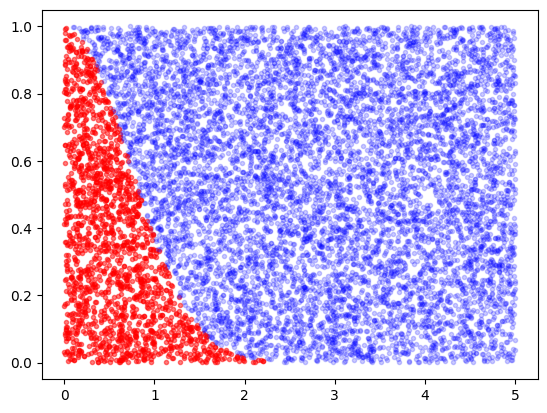

In [26]:
contador = 0
n = 10000

#limito entre 0 y 5 a 'x', y de 0 a 1 a 'y'
min = 0
max_x = 5
max_y = 1 

for i in range (n):
    x = np.random.random() * (max_x - min) + min
    y = np.random.random() 

    if y < np.e**(-x**2):
        contador += 1
        plt.plot(x,y,'.r', alpha= 0.5)
    else:
        plt.plot(x,y,'.b', alpha = 0.2)
    plt.show

integral = contador / n
area = max_x * max_y

#recordando que es simetrica y solo obtuvimos media distribución, multiplicamos por 2 para ver el valor completo
solucion = 2*integral*area
print(solucion)

### 5. Random Walk
En física, los caminos aleatorios, o 'random walks', son utilizados como modelos simplificados del movimiento browniano y difusión tales como el movimiento aleatorio de las moléculas en líquidos y gases. Además, los caminos aleatorios y algunos de los caminos que interactúan consigo mismos juegan un papel en la teoría cuántica de campos.<br><br> 
Para introducir el tema, podríamos simular la siguiente situación:  <br>
Supongamos que salimos a caminar, y que aleatoreamente en cada esquina decidimos en qué dirección queremos avanzar. Al cabo de varias 'esquinas', vemos a cuantas cuadras estamos de casa, si estamos a mas de 4 cuadras nos vamos a tomar el bondi para volver, estamos cansados, sino volvemos a pie.<br>
La pregunta entonces es. Cual es la caminata aleatoria máxima (cuantas cuadras máx) que podemos tomar entre 10 y 30 tal que en promedio siempre termine a menos de 4 cuadras?.<br><br>
Analizar gráficamente, punto extra si se animan a guardar los resultados en un dataframe y determinar con lo visto en la unidad 5 cual es la mayor cantidad de cuadras que podemos hacer que en promedio nos devuelva que volvemos caminando ;)


la max caminata random que puedo hacer para volver caminando la mayoria de las veces es 22


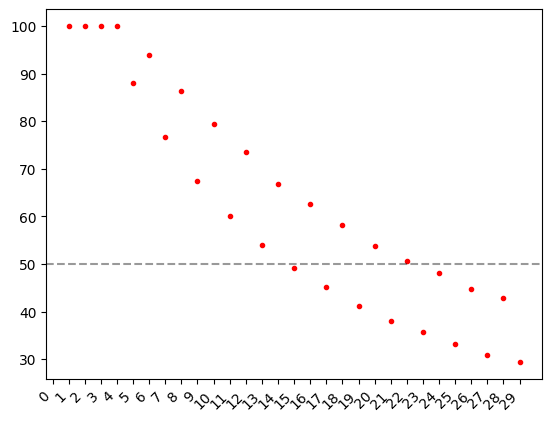

In [41]:
def random_walk(n):
    #inicializo mi posición
    x = 0
    y = 0
    for i in range(n):
        #tengo que devolver arriba, abajo, izquierda o  derecha, hay varias maneras de hacer esto, yo voy a ir por la siguiente
        (dx,dy) = random.choice([(0,1),(0,-1),(1,0),(-1,0)])
        x += dx 
        y += dy 
    #devuelvo para donde me voy a mover
    return(x,y)

N = 20000 #cuantas veces vamos a probar salir a caminar
max = 30
distancia_bondi = 4

pasos_rw = np.arange(1,max,1)
vuelvo_caminando = np.zeros(len(pasos_rw))

for pasos in range(1, len(pasos_rw)+1):
    #caminatas que me dejan a menos de  4 cuadras
    no_bondi = 0
    for i in range(N):
        (x,y) = random_walk(pasos)
        distancia = abs(x) + abs(y)
        if distancia <= distancia_bondi:
            no_bondi +=1
    porc = float(no_bondi) / N 
    #print(f'Caminata de {str(pasos)} pasos, % de veces que volvi a pata: {str(round(porc*100,2))}')
    vuelvo_caminando[pasos-1] = round(porc*100,2)

plt.plot(pasos_rw,vuelvo_caminando,'.r')
plt.xticks(ticks=np.arange(0,30,1),rotation=45, ha='right')
plt.axhline(50, alpha = 0.4,ls='--',color='black' )

df = pd.DataFrame({'cant_pasos':pasos_rw, 'porc_veces_camino':vuelvo_caminando})
caminata_max = df.cant_pasos.loc[(df.porc_veces_camino >= 50)].max()
print(f'la max caminata random que puedo hacer para volver caminando la mayoria de las veces es {caminata_max}')
plt.show()


### 6. Calcule el volumen de 1/8 de esfera 
de radio $r = 4m $ y $ z = \int_0^R \int_0^R \sqrt{R^{2}-x^{2}+y^{2}}dxdy $<br><br>
Para validar esta integral, tenga en cuenta que el volumen de 1/8 de esfera es <br><br>
$volumen =\frac{4}{3}\frac{\pi R^{3}}{8}$


Vol montecarlo: 34.096 m^3. Vol definicion: 33.51m^3


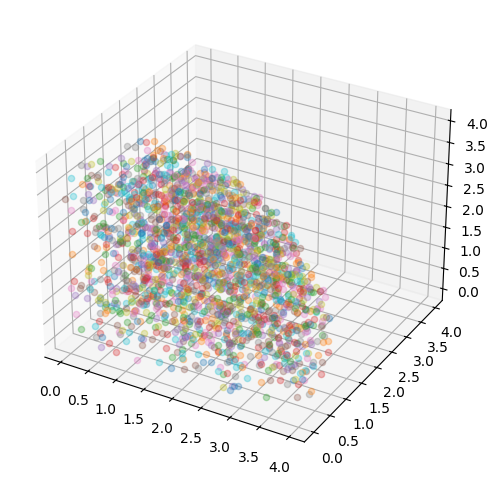

In [28]:
contador = 0
n = 4000
r = 4
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot( projection='3d')

for i in range (n):
    #como los nros son positivos, va a estar en el primer octante
    x = np.random.rand() * r
    y = np.random.rand() * r
    z = np.random.rand() * r
    d = x**2 + y**2

    if z**2 <= r**2 - d:
            contador = contador + 1
            ax.scatter(x,y,z, alpha=0.3) 
            
integral = contador / n
vol_recinto = r**3
vol_mc = integral * vol_recinto
vol_def = round(((4/3) * np.pi * r**3 )/ 8,2) 
print('Vol montecarlo: '+ str(vol_mc) + ' m^3. Vol definicion: ' + str(vol_def) + 'm^3' )
plt.show()



### 7. Momento de incercia de un cilindro respecto al eje z - Modelo por MonteCarlo
Dado un sistema de partículas y un eje arbitrario, el momento de inercia del mismo se define como la suma de los productos de las masas de las partículas por el cuadrado de la distancia mínima r de cada partícula a dicho eje. <br><br>
$I = \sum m_ir_i^{2}$<br><br>
Para obtener el momento de incercia de un cilindro, como ser el del primer TP de Labo 1,  podemos hacer la triple integral en coordenadas  que aquí omitiremos y nos vá a devolver la fórmula<br> <br>
$I = \frac{1}{2} M R^{2}$<br><br>
Supongamos entonces que tenemos un cilindro de radio $r = 1 cm$, altura $h = 1 cm$, y masa $m = 20g$<br>
Se anima a encontrar su momento de incercia mediante el método de MonteCarlo?<br> 
Itere unas 50, 100 y 1200 veces, compare contra los resultados teóricos.<br>


Solución por MC, momento de inercia de un cilindro en 5000 iteraciones: 10.00348995005579 g cm^2
Solucion analítica 10.0 g cm^2


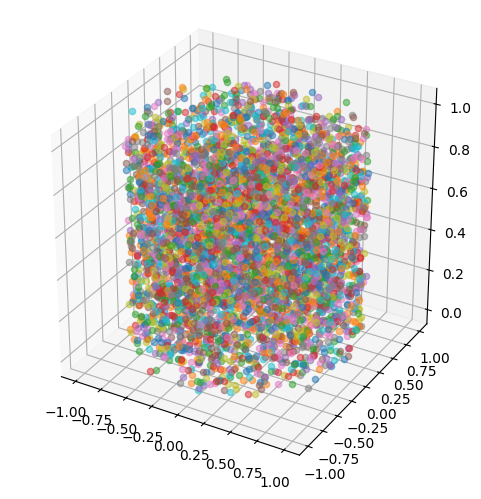

In [29]:
m = 20
r = 1
N = 5000 #cantidad de iteraciones
dm = m/N #pequeñas masitas representadas por nuestros puntos

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(aspect = 'equal' , projection='3d')

Imc = 0 #momento de incercia acumulado
i = 0 #iterador
while N > i:
    rx = r *(np.random.random() * 2-1)
    ry = r *(np.random.random() * 2-1)
    rz = r *(np.random.random()) #limito la altura a h = 1
    if rx**2 + ry**2 < r : # solo la voy a tener en cuenta si el modulo de la posición es menor al radio del cilindro, ya que limite la altura
        ax.scatter(rx,ry,rz, alpha=0.5)
        Imc = Imc + dm * (rx**2 + ry**2)
        i+=1
            
print(f'Solución por MC, momento de inercia de un cilindro en {N} iteraciones: {Imc} g cm^2')
print(F'Solucion analítica {0.5*m*r**2} g cm^2')